

---



# Install libraries

In [ ]:
!conda install -y gdown
!pip install google-play-scraper

/bin/bash: line 1: conda: command not found


In [ ]:
!pip install PySastrawi

# Import Library

In [ ]:
from google_play_scraper import Sort, reviews_all, reviews
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Retrieve a user review of the sayurbox application from the Google Play web site.

Dalam mengambil ulasan aplikasi Sayurbox, saya menggunakan library reviews untuk mendapatkan semua informasi yang akan digunakan untuk analisis, seperti reviewID, username, content, score, date, dll.

In [ ]:
# scraping review netflix
# netflix, continuation_token = reviews('com.netflix.mediaclient', # defaults to 0
#                                        lang='id', # defaults to 'id'
#                                        country='id', # defaults to 'id'
#                                        sort=Sort.NEWEST, # defaults to sort.MOST_RELEVANT
#                                        count=1000)

In [ ]:
# data_netflix = pd.DataFrame(netflix)
# data_netflix

In [ ]:
# data_netflix.to_excel('data_netflix.xlsx', index=False)
# data_netflix

# Connect & import the datasets from Google Drive

In [ ]:
!gdown --id 1HTQYVyck5phPciT9fRFRWIiC8-RPSTev

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HTQYVyck5phPciT9fRFRWIiC8-RPSTev
To: /content/data_disneyiniyangbaru.xlsx
100% 174k/174k [00:00<00:00, 93.7MB/s]


# Read the dataset

In [ ]:
disney = pd.read_excel('data_disneyiniyangbaru.xlsx')
disney.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a949d5d6-32a0-43ad-92a6-689ebffc5bc0,Alfareza Mahendra,https://play-lh.googleusercontent.com/a-/ALV-U...,Baru aja berlangganan videonya semua gak ada y...,1,0,24.05.20.1,2024-05-31 17:25:00,"Hai, mohon maaf atas ketidaknyamanannya. Kamu ...",2024-06-01 09:46:51,24.05.20.1
1,b505c864-b67a-497d-80d8-ce94f626e253,Soleha Jaja,https://play-lh.googleusercontent.com/a/ACg8oc...,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",1,0,NaN,2024-05-31 15:38:14,NaN,NaT,NaN
2,6aa06b58-b79c-46b1-808a-610cc21ba378,willem lilipory,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus,5,0,NaN,2024-05-30 09:20:59,NaN,NaT,NaN
3,3954e742-f730-42e2-8bd6-c20e9d4bafa1,Yolanda Virzinia,https://play-lh.googleusercontent.com/a/ACg8oc...,👎🏻👎🏻👎🏻👎🏻👎🏻,1,0,NaN,2024-05-30 08:31:35,NaN,NaT,NaN
4,ed14786e-2b43-48e5-aae7-ee1513433154,agus wibowo,https://play-lh.googleusercontent.com/a/ACg8oc...,'1. . 14 . aqn 1 . .,2,0,12.4.2,2024-05-30 08:01:32,NaN,NaT,12.4.2




---



# Data Exploration

## Displays the entire dataset column

In [ ]:
disney.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

## Summary

In [ ]:
# menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = disney.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              796 non-null    object        
 1   userName              796 non-null    object        
 2   userImage             796 non-null    object        
 3   content               796 non-null    object        
 4   score                 796 non-null    int64         
 5   thumbsUpCount         796 non-null    int64         
 6   reviewCreatedVersion  465 non-null    object        
 7   at                    796 non-null    datetime64[ns]
 8   replyContent          287 non-null    object        
 9   repliedAt             287 non-null    datetime64[ns]
 10  appVersion            465 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 68.5+ KB
Ringkasan informasi: None


## Find Missing Values

In [ ]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', disney.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    331
at                        0
replyContent            509
repliedAt               509
appVersion              331
dtype: int64


Ada 2 kolom yang mempunyai banyak missing values berjumlah 1000, yaitu replyContent dan repliedAt. Selain itu, terdapat kolom yang berisi missing values yang berjumlah 300 NaN, yaitu reviewCreatedVersion. Kolom replyContent dan repliedAt tidak dilakukan pengisian nilai karena berisi balasan ulasan yang diberikan oleh pihak Sayurbox terhadap ulasan pengguna dan tanggal balasannya. Sedangkan missing values yang terdapat di kolom reviewCreatedVersion tidak diisi karena berisi versi dari aplikasi Sayurbox.

## Remove Missing Values

In [ ]:
# menghapus kolom replyContent, repliedAt, dan reviewCreatedVersion yang berisi missing values
disney = disney.drop(['replyContent','repliedAt','reviewCreatedVersion'], axis=1)
disney.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,appVersion
0,a949d5d6-32a0-43ad-92a6-689ebffc5bc0,Alfareza Mahendra,https://play-lh.googleusercontent.com/a-/ALV-U...,Baru aja berlangganan videonya semua gak ada y...,1,0,2024-05-31 17:25:00,24.05.20.1
1,b505c864-b67a-497d-80d8-ce94f626e253,Soleha Jaja,https://play-lh.googleusercontent.com/a/ACg8oc...,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",1,0,2024-05-31 15:38:14,NaN
2,6aa06b58-b79c-46b1-808a-610cc21ba378,willem lilipory,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus,5,0,2024-05-30 09:20:59,NaN
3,3954e742-f730-42e2-8bd6-c20e9d4bafa1,Yolanda Virzinia,https://play-lh.googleusercontent.com/a/ACg8oc...,👎🏻👎🏻👎🏻👎🏻👎🏻,1,0,2024-05-30 08:31:35,NaN
4,ed14786e-2b43-48e5-aae7-ee1513433154,agus wibowo,https://play-lh.googleusercontent.com/a/ACg8oc...,'1. . 14 . aqn 1 . .,2,0,2024-05-30 08:01:32,12.4.2


## Rename the columns

In [ ]:
# mengganti nama kolom tanggal
disney.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', disney.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date', 'appVersion'],
      dtype='object')


## Separate the date in the timestamp of the At column

In [ ]:
# memisahkan tanggal yang terletak di timestamps
disney['date'] = pd.to_datetime(disney['date']).dt.date
disney.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,date,appVersion
0,a949d5d6-32a0-43ad-92a6-689ebffc5bc0,Alfareza Mahendra,https://play-lh.googleusercontent.com/a-/ALV-U...,Baru aja berlangganan videonya semua gak ada y...,1,0,2024-05-31,24.05.20.1
1,b505c864-b67a-497d-80d8-ce94f626e253,Soleha Jaja,https://play-lh.googleusercontent.com/a/ACg8oc...,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",1,0,2024-05-31,NaN
2,6aa06b58-b79c-46b1-808a-610cc21ba378,willem lilipory,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus,5,0,2024-05-30,NaN
3,3954e742-f730-42e2-8bd6-c20e9d4bafa1,Yolanda Virzinia,https://play-lh.googleusercontent.com/a/ACg8oc...,👎🏻👎🏻👎🏻👎🏻👎🏻,1,0,2024-05-30,NaN
4,ed14786e-2b43-48e5-aae7-ee1513433154,agus wibowo,https://play-lh.googleusercontent.com/a/ACg8oc...,'1. . 14 . aqn 1 . .,2,0,2024-05-30,12.4.2


In [ ]:
# memisahkan tahun dan bulan
disney['year'] = pd.to_datetime(disney['date']).dt.year
disney['month'] = pd.to_datetime(disney['date']).dt.month
# sayurbox['month'] = sayurbox['month'].apply(lambda x: calendar.month_abbr[x])

# Data Visualization

<ipython-input-293-72941e555375>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="score", data=disney, palette="pastel")


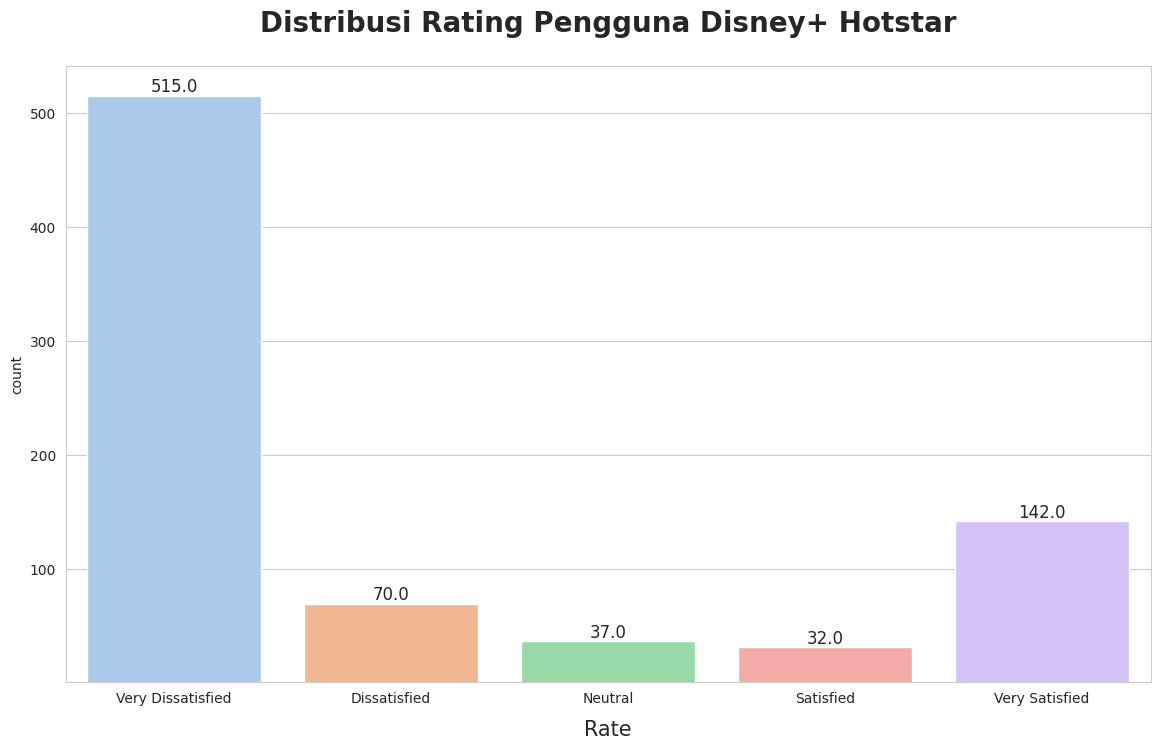

In [ ]:
# visualisasi bar chart untuk melihat jumlah rating pengguna Sayurbox
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=disney, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna Disney+ Hotstar', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

In [ ]:
grouped_data = disney.groupby(['score', 'year']).size().reset_index(name='count')

In [ ]:
label_mapping = {
    "Very Dissatisfied": 0,
    "Dissatisfied": 1,
    "Neutral": 2,
    "Satisfied": 3,
    "Very Satisfied": 4
}

grouped_data['score'] = grouped_data['score'].map(label_mapping)

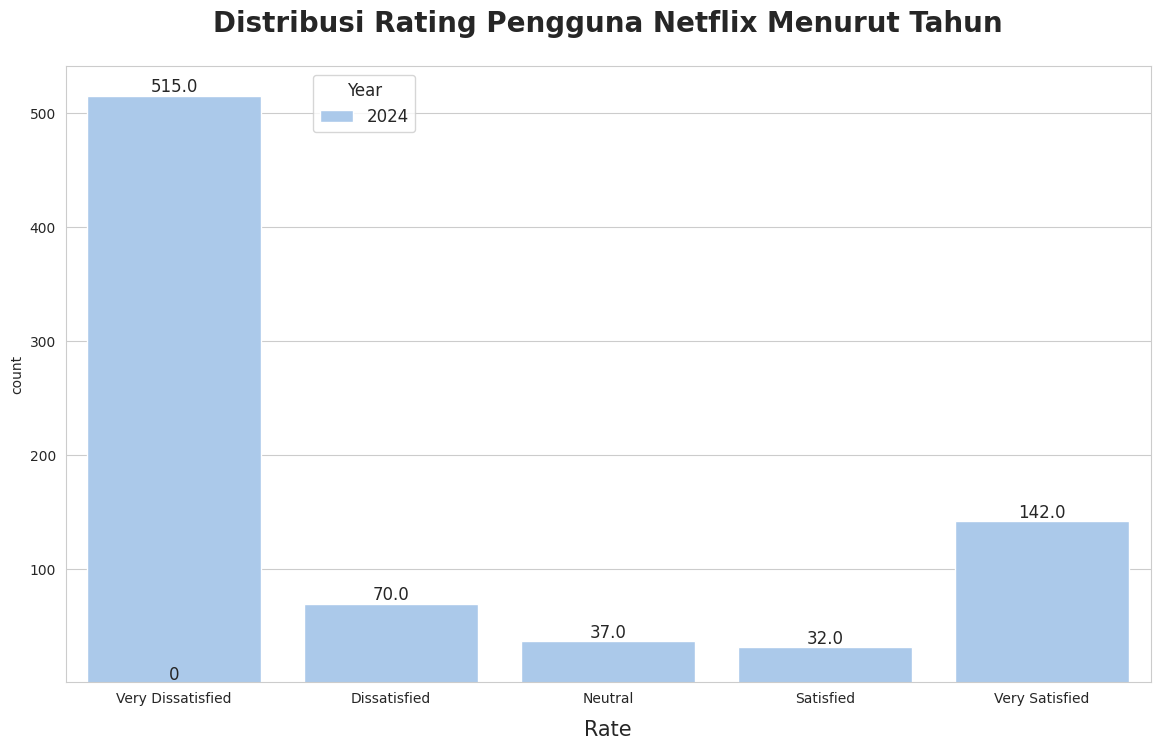

In [ ]:
# mem-breakdown bar chart pada sel sebelumnya berdasarkan tahun
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=disney, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna Netflix Menurut Tahun', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## Delete unnecessary columns and does not provide any information.

In [ ]:
disney.drop(['reviewId','userName','userImage','score','thumbsUpCount','date','year','month'], axis=1, inplace=True)

In [ ]:
print('Ringkasan dataset setelah dilakukan manipulasi data', disney.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     796 non-null    object
 1   appVersion  465 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [ ]:
disney.head()

,content,appVersion
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1
1,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",NaN
2,Bagus,NaN
3,👎🏻👎🏻👎🏻👎🏻👎🏻,NaN
4,'1. . 14 . aqn 1 . .,12.4.2


## Delete Duplicate Data that contain in the content column

In [ ]:
# menghitung jumlah ulasan yang duplikasi
disney.duplicated().sum()

11

In [ ]:
# menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
disney.drop_duplicates(inplace=True)

In [ ]:
# mengecek kembali jumlah duplikat setelah di hapus
disney.duplicated().sum()

0

Ulasan sudah bersih dari duplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll.



---



# Data Preparation

## Case Folding

In [ ]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

disney['clean_review'] = disney['content'].apply(lambda low:lowercase(str(low)))

In [ ]:
disney.head()

,content,appVersion,clean_review
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...
1,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",NaN,"apk nya lemot,jelek,burik,masa cuma kode aja l..."
2,Bagus,NaN,bagus
3,👎🏻👎🏻👎🏻👎🏻👎🏻,NaN,👎🏻👎🏻👎🏻👎🏻👎🏻
4,'1. . 14 . aqn 1 . .,12.4.2,'1. . 14 . aqn 1 . .


# Cleaning Data

## Remove the emoji of the text.

In [ ]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

disney['clean_review'] = disney['clean_review'].apply(lambda emoji: remove_emoji(emoji))

## remove hashtag

In [ ]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

disney['clean_review'] = disney['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

## remove punctuation and number

In [ ]:
# menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

disney['clean_review'] = disney['clean_review'].apply(lambda num: remove_number(num))

In [ ]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

disney['clean_review'] = disney['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [ ]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

disney['clean_review'] = disney['clean_review'].apply(lambda num: remove_superscript(num))

## remove words repetition

In [ ]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

disney['clean_review'] = disney['clean_review'].apply(lambda word: word_repetition(word))

In [ ]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

disney['clean_review'] = disney['clean_review'].apply(lambda word: repetition(word))

## remove whitespaces

Meskipun telah dibersihkan, ulasan masih bisa mengandung spasi ganda yang dapat berasal dari pengguna ketika mengetik ataupun ketika melakukan pembersihan ulasan. Maka dari itu, menghapus spasi ganda diperlukan.

In [ ]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

disney['clean_review'] = disney['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

## remove another words which doesn't give any information

Ulasan pengguna tidak hanya berisi kata yang bisa ditafsirkan atau dimengerti oleh manusia. Ada kalanya pengguna memberikan informasi berupa kode voucher, ketawa, atau kata abstrak yang tidak bisa/sulit diterjemahkan. Dimana kata tersebut bisa membingungkan orang yang menganalisisnya karena tidak tahu arti dari kata tersebut. Maka dari itu, saya melakukan pembersihan secara mendalam dengan menghapus seluruh kata abstrak yang nantinya tidak memberikan informasi apapun kepada model dan hanya menghambat kinerja model.

In [ ]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

disney['clean_review'] = disney['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

In [ ]:
disney.head()

,content,appVersion,clean_review
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...
1,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",NaN,apk nya lemot jelek burik masa cuma kode aja l...
2,Bagus,NaN,bagus
3,👎🏻👎🏻👎🏻👎🏻👎🏻,NaN,
4,'1. . 14 . aqn 1 . .,12.4.2,aqn


## change slang into standard terms (Normalization Phase)

Menormalisasikan kata singkat dan tidak baku menjadi kata baku sesuai dengan KBBI.

In [ ]:
!gdown --id 1_X69mvVUcfQ6eAiDoqLL-BTw5cmOa5jD

slangs = open('slang_disney.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_X69mvVUcfQ6eAiDoqLL-BTw5cmOa5jD
To: /content/slang_disney.txt
100% 6.62k/6.62k [00:00<00:00, 12.0MB/s]


In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['aneh', ' aneh'], ['bgt', ' bgt'], ['gabisa', ' gabisa'], ['login', ' login'], ['parah', ' parah'], ['logout', ' logout'], ['ponsel', ' ponsel'], ['nomor', ' nomor'], ['pesan', ' pesan'], ['terdeteksi', ' deteksi'], ['traffic', ' traffic'], ['wajar', ' wajar'], ['perangkat', ' perangkat'], ['mohon', ' mohon'], ['periksa', ' periksa'], ['koneksi', ' koneksi'], ['internet', ' internet'], ['blablabla', ' blablabla'], ['mencoba', ' coba'], ['gonta', ' gonta'], ['ganti', ' ganti'], ['jg', ' jg'], ['takut', ' takut'], ['perpanjang', ' panjang'], ['langganan', ' langgan'], ['lg', ' lg'], ['sumpah', ' sumpah'], ['ni', ' ni'], ['aplikasi', ' aplikasi'], ['jd', ' jd'], ['si', ' si'], ['ga', ' ga'], ['bs', ' bs'], ['dibuka', ' buka'], ['bermutu', ' mutu'], ['menonton', ' tonton'], ['videonya', ' video'], ['lumayan', ' lumayan'], ['bagus', ' bagus'], ['subtitle', ' subtitle'], ['nya', ' nya'], ['kendala', ' kendala'], ['pokok', ' pokok'], ['ditingkatkan', ' tingkat'], ['pelayanan', ' layan'], ['

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'aneh': 'aneh',
 'bgt': 'bgt',
 'gabisa': 'gabisa',
 'login': 'login',
 'parah': 'parah',
 'logout': 'logout',
 'ponsel': 'ponsel',
 'nomor': 'nomor',
 'pesan': 'pesan',
 'terdeteksi': 'deteksi',
 'traffic': 'traffic',
 'wajar': 'wajar',
 'perangkat': 'perangkat',
 'mohon': 'mohon',
 'periksa': 'periksa',
 'koneksi': 'koneksi',
 'internet': 'internet',
 'blablabla': 'blablabla',
 'mencoba': 'coba',
 'gonta': 'gonta',
 'ganti': 'ganti',
 'jg': 'jg',
 'takut': 'takut',
 'perpanjang': 'panjang',
 'langganan': 'langgan',
 'lg': 'lg',
 'sumpah': 'sumpah',
 'ni': 'ni',
 'aplikasi': 'aplikasi',
 'jd': 'jd',
 'si': 'si',
 'ga': 'ga',
 'bs': 'bs',
 'dibuka': 'buka',
 'bermutu': 'mutu',
 'menonton': 'tonton',
 'videonya': 'video',
 'lumayan': 'lumayan',
 'bagus': 'bagus',
 'subtitle': 'subtitle',
 'nya': 'nya',
 'kendala': 'kendala',
 'pokok': 'pokok',
 'ditingkatkan': 'tingkat',
 'pelayanan': 'layan',
 'yg': 'yg',
 'benr': 'benr',
 'aja': 'aja',
 'gw': 'gw',
 'udah': 'udah',
 'dwonload': 'dwon

In [ ]:
clean_text = []
for review in disney['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [ ]:
clean_text

['baru aja langgan video semua gak ada yang bisa di play selalu buffering lg buffering lg mening netflix',
 'apk nya lemot jelek burik masa cuma kode aja lelet nya minta ampun trus beralih ke telpon malah nambah lelet ini apk apa tempat sampah',
 'bagus',
 '',
 'aqn',
 'ini apk macam apa sih download film berasa kayak antre sembako lama bgt padahal udh pake wi fi lancar bgt',
 'harga doang mahal kualitas sampah malu woi malu',
 'boycott zionist product',
 'waktu pengirimab code verivikasi lag itu gimana ngatasin ny',
 'beneran kecewa padahal udah include langgan sama indihome tapi sudah sebulan ini malah tercantum sebagai guna gratis dan harus langgan langsung ke disney hotstar',
 'marvel lama jelek',
 'penipu anjeeng nyesel aku langgan tertulis p ehh p yg hadir baik tolooll',
 'tolong baik lagi',
 'tak menarik',
 'jelek bngt iw',
 'aplikasi nya bagus tapi knp pixar nya harus langgan kan harus di bayar',
 'black screen sudah teratasi dengan re install ulang moga kedepannya lebih baik l

In [ ]:
disney['normalization'] = clean_text

In [ ]:
disney.head()

,content,appVersion,clean_review,normalization
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...,baru aja langgan video semua gak ada yang bisa...
1,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",NaN,apk nya lemot jelek burik masa cuma kode aja l...,apk nya lemot jelek burik masa cuma kode aja l...
2,Bagus,NaN,bagus,bagus
3,👎🏻👎🏻👎🏻👎🏻👎🏻,NaN,,
4,'1. . 14 . aqn 1 . .,12.4.2,aqn,aqn


## delete words containing 3 letters

Setelah melakukan analisis terhadap ulasan yang telah bersih, menghapus kata abstrak tidak cukup untuk membuat ulasan bersih karena masih ditemukan beberapa kata yang tidak sesuai dan membingungkan. Oleh karena itu, saya melakukan penghapusan kata yang terdiri dari 3 huruf, seperti oh, iya, ini, itu, dll, dan tidak memberikan informasi penting bagi model saat melakukan prediksi.

In [ ]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [ ]:
disney['final_text'] = disney['normalization'].apply(lambda remove: remove_small_words(str(remove)))

# Word Tokenizing

In [ ]:
def word_token(review_text):
  return word_tokenize(review_text)

In [ ]:
disney['token'] = disney['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [ ]:
disney.head()

,content,appVersion,clean_review,normalization,final_text,token
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...,baru aja langgan video semua gak ada yang bisa...,baru langgan video semua yang bisa play se...,"[baru, langgan, video, semua, yang, bisa, play..."
1,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",NaN,apk nya lemot jelek burik masa cuma kode aja l...,apk nya lemot jelek burik masa cuma kode aja l...,lemot jelek burik masa cuma kode lelet min...,"[lemot, jelek, burik, masa, cuma, kode, lelet,..."
2,Bagus,NaN,bagus,bagus,bagus,[bagus]
3,👎🏻👎🏻👎🏻👎🏻👎🏻,NaN,,,,[]
4,'1. . 14 . aqn 1 . .,12.4.2,aqn,aqn,,[]


# Wordcloud Visualization

In [ ]:
review_all = []

for review in disney['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Output streaming akan dipotong hingga 5000 baris terakhir.
months
actually
former
netflix
user
realized
that
netflix
movies
weren
taste
moved
disney
yeah
love
unfortunately
kinda
expensive
know
kinda
glitched
lagged
this
connection
issue
tried
watch
other
platform
okay
their
more
like
pixel
square
thing
very
bold
harga
langgan
terlalu
mahal
film
tidak
bisa
diputar
lancar
lewat
rekomendasi
film
jelek
kebanyakan
kids
animasi
movie
film
sampah
marvel
avengers
bangkrut
aplikasi
ngga
bisa
buka
kenapa
setelah
keluar
akun
masuk
lagi
malah
susah
bisa
login
selalu
muncul
tulisan
kami
telah
mendeteksi
traffic
tidak
biasa
perangkat
semakin
mahal
langgan
jangan
hanya
iklan
yang
muncul
tolong
baik
masalah
saya
yaitu
iklan
tidak
memberikan
kesempatan
mencari
saya
langgan
aplikasi
tapi
saya
tidak
bisa
membuka
saya
film
banyak
tidak
bisa
tonton
jelek
sesuai
etpetasi
masa
masukin
nomor
telepon
bisa
padahal
bener
lohh
tolong
kembali
tayangkan
film
home
alone
televisi
kenapa
saya
tidak
bisa
membuka
aplik

In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire Disney+ Hotstar's review")
freq_dist

how many frequency distribution samples from an entire Disney+ Hotstar's review


FreqDist({'langgan': 181, 'bisa': 181, 'saya': 167, 'tidak': 153, 'film': 127, 'aplikasi': 121, 'sudah': 101, 'disney': 92, 'tapi': 91, 'yang': 77, ...})

In [ ]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('langgan', 181), ('bisa', 181), ('saya', 167), ('tidak', 153), ('film', 127), ('aplikasi', 121), ('sudah', 101), ('disney', 92), ('tapi', 91), ('yang', 77), ('udah', 73), ('padahal', 72), ('bagus', 68), ('bayar', 68), ('nonton', 67), ('lagi', 66), ('kenapa', 62), ('tolong', 58), ('login', 54), ('harga', 49), ('baik', 48), ('mahal', 46), ('banyak', 44), ('terus', 44), ('sama', 41), ('jelek', 40), ('banget', 40), ('semua', 38), ('buka', 38), ('tahun', 38), ('download', 36), ('jadi', 36), ('baru', 34), ('malah', 34), ('video', 32), ('dari', 32), ('dulu', 32), ('kode', 31), ('gambar', 31), ('buat', 30), ('tonton', 30), ('untuk', 30), ('juga', 30), ('update', 29), ('sangat', 29), ('pakai', 29), ('sekarang', 28), ('masuk', 28), ('sering', 28), ('hitam', 28), ('saja', 27), ('karena', 26), ('masih', 26), ('kecewa', 25), ('coba', 25), ('naik', 25), ('harus', 24), ('lebih', 24), ('dapat', 24), ('kali', 24), ('hanya', 24), ('layar', 24), ('selalu', 23), ('dengan', 23), ('sekali', 23), ('error',

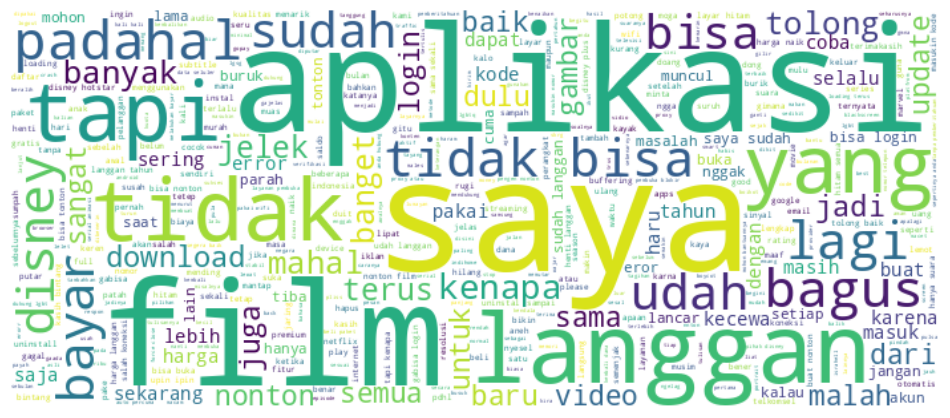

In [ ]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,langgan,181
1,bisa,181
2,saya,167
3,tidak,153
4,film,127
...,...,...
474,zionist,2
473,boycott,2
472,malu,2
471,tempat,2


In [ ]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

<ipython-input-333-01404f08f827>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')


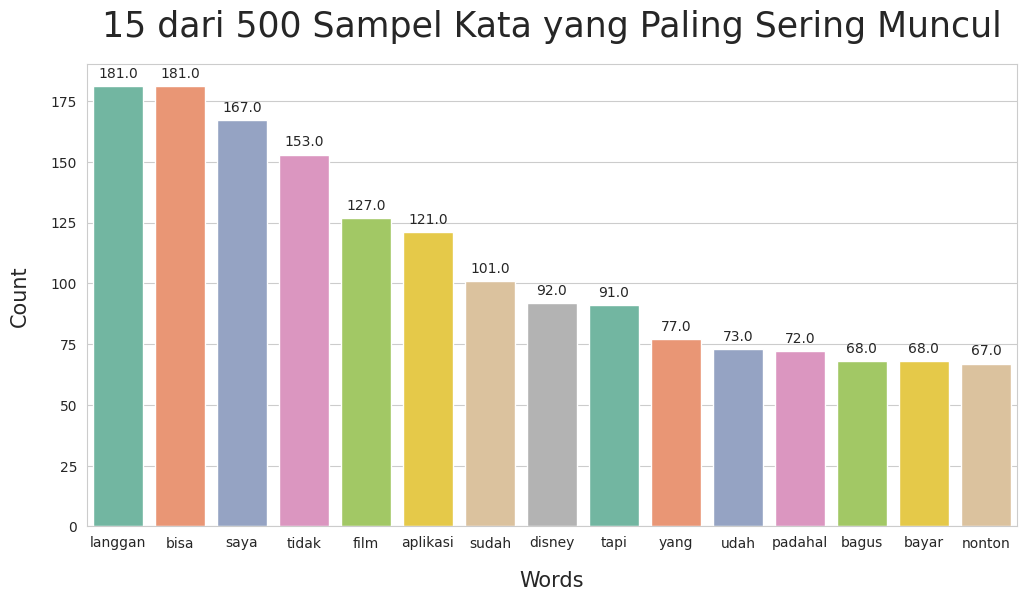

In [ ]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# Remove Stopword in bahasa

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [ ]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

## function that used to remove stopwords

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

disney['stop_review'] = disney['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [ ]:
disney.head()

,content,appVersion,clean_review,normalization,final_text,token,stop_review
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...,baru aja langgan video semua gak ada yang bisa...,baru langgan video semua yang bisa play se...,"[baru, langgan, video, semua, yang, bisa, play...","[langgan, video, play, buffering, buffering, m..."
1,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",NaN,apk nya lemot jelek burik masa cuma kode aja l...,apk nya lemot jelek burik masa cuma kode aja l...,lemot jelek burik masa cuma kode lelet min...,"[lemot, jelek, burik, masa, cuma, kode, lelet,...","[lemot, jelek, burik, kode, lelet, ampun, trus..."
2,Bagus,NaN,bagus,bagus,bagus,[bagus],[bagus]
3,👎🏻👎🏻👎🏻👎🏻👎🏻,NaN,,,,[],[]
4,'1. . 14 . aqn 1 . .,12.4.2,aqn,aqn,,[],[]


# Text Normalization
## Stemming Normalization

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

disney['stem_review'] = disney['stop_review'].apply(lambda stem:back_to_root(stem))

In [ ]:
disney.head()

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...,baru aja langgan video semua gak ada yang bisa...,baru langgan video semua yang bisa play se...,"[baru, langgan, video, semua, yang, bisa, play...","[langgan, video, play, buffering, buffering, m...",langgan video play buffering buffering ning ne...
1,"Apk nya lemot,jelek,burik,masa cuma kode aja l...",NaN,apk nya lemot jelek burik masa cuma kode aja l...,apk nya lemot jelek burik masa cuma kode aja l...,lemot jelek burik masa cuma kode lelet min...,"[lemot, jelek, burik, masa, cuma, kode, lelet,...","[lemot, jelek, burik, kode, lelet, ampun, trus...",lot jelek burik kode lelet ampun trus alih tel...
2,Bagus,NaN,bagus,bagus,bagus,[bagus],[bagus],bagus
3,👎🏻👎🏻👎🏻👎🏻👎🏻,NaN,,,,[],[],
4,'1. . 14 . aqn 1 . .,12.4.2,aqn,aqn,,[],[],


# Data Labeling

Ulasan masih belum mempunyai sentimen sehingga sulit untuk mencari tahu apakah pengguna memberikan ulasan positif atau negatif. Proses pemberian sentimen tidak mungkin dilakukan secara manual dengan melihat ulasan secara satu per satu karena membutuhkan waktu yang lama dan memerlukan seorang ahli di bidang bahasa yang dapat menafsirkan ulasan kemudian mengelompokkan ke sentimen positif dan negatif. Maka dari itu, saya melakukan proses pemberian label sentimen dengan menerapkan metode yang berbasis lexicon atau biasa dikenal dengan lexicon-based method. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.

## Connect to Google Drive

In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 36.1MB/s]


In [ ]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 61.0MB/s]


## Read the positive and negative lexicon

In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

## Create a function named sentiment_analysis_lexicon_indonesia which contains a for loop and if conditions to label each review

Ulasan diberi score terlebih dahulu dengan menyesuaikan dengan bobot kata yang terdapat di kamus. +5 untuk kata positif dan -5 untuk negatif. Setelah itu, bobot ulasan dijumlahkan kemudian di kelompokkan menjadi sentimen positif, negatif, dan netral. netral ini diartikan sebagai hasil kalkulasi ulasan bernilai 0. Karena fokus analisis ini hanya sentimen positif dan negatif, maka ulasan yang mengandung sentimen netral nanti akan di hilangkan.

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

### Conduct functional tests on dummy sentences.

In [ ]:
string = "aplikasi ini sangat bagus bagus dan jujur"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-7, 'negatif')

### Separate the sentences in the stem_review column and then apply the sentiment_analysis_lexicon_indonesia function to that column

In [ ]:
disney['prepos_text'] = disney.stem_review.str.split()

In [ ]:
results = disney['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
disney['polarity_score'] = results[0]
disney['polarity'] = results[1]
print(disney['polarity'].value_counts())

polarity
negatif    414
positif    192
netral     179
Name: count, dtype: int64


In [ ]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
disney = disney.replace('',np.nan, regex=True)
disney = disney.dropna()

In [ ]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
disney = disney.reset_index(drop=True)

In [ ]:
print(disney['polarity'].value_counts())

polarity
negatif    258
positif    114
netral      76
Name: count, dtype: int64


In [ ]:
disney[(disney['polarity']=='netral')]

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
1,"Ini apk macam apa sih, download film berasa ka...",24.05.06.7,ini apk macam apa sih download film berasa kay...,ini apk macam apa sih download film berasa kay...,macam download film berasa kayak antre sem...,"[macam, download, film, berasa, kayak, antre, ...","[download, film, berasa, kayak, antre, sembako...",download film asa kayak antre sembako pake lancar,"[download, film, asa, kayak, antre, sembako, p...",0,netral
2,"Harga doang mahal, kualitas sampah!! Malu woi ...",24.05.06.7,harga doang mahal kualitas sampah malu woi malu,harga doang mahal kualitas sampah malu woi malu,harga doang mahal kualitas sampah malu malu,"[harga, doang, mahal, kualitas, sampah, malu, ...","[harga, doang, mahal, kualitas, sampah, malu, ...",harga doang mahal kualitas sampah malu malu,"[harga, doang, mahal, kualitas, sampah, malu, ...",0,netral
8,aneh bgt gabisa login,24.05.06.7,aneh bgt gabisa login,aneh bgt gabisa login,aneh gabisa login,"[aneh, gabisa, login]","[aneh, gabisa, login]",aneh gabisa login,"[aneh, gabisa, login]",0,netral
11,Mulai banyak unsur lgbtq+,12.4.9,mulai banyak unsur lgbtq,mulai banyak unsur lgbtq,mulai banyak unsur lgbtq,"[mulai, banyak, unsur, lgbtq]","[unsur, lgbtq]",unsur lgbtq,"[unsur, lgbtq]",0,netral
15,"Xtb,a1,qq yabr yk huyf u f",24.01.01.6,xtb a qq yabr yk huyf u f,xtb a qq yabr yk huyf u f,yabr huyf,"[yabr, huyf]","[yabr, huyf]",yabr huyf,"[yabr, huyf]",0,netral
...,...,...,...,...,...,...,...,...,...,...,...
385,Banyakin drakor bertema kerajaan donk,23.11.06.4,banyakin drakor bertema kerajaan donk,banyakin drakor bertema kerajaan donk,banyakin drakor bertema kerajaan donk,"[banyakin, drakor, bertema, kerajaan, donk]","[banyakin, drakor, bertema, kerajaan, donk]",banyakin drakor tema raja donk,"[banyakin, drakor, tema, raja, donk]",0,netral
388,Notifikasi,24.01.15.8,notifikasi,notifikasi,notifikasi,[notifikasi],[notifikasi],notifikasi,[notifikasi],0,netral
413,x education is a,24.01.01.6,x education is a,x education is a,education,[education],[education],education,[education],0,netral
418,Ra ceto,24.01.01.6,ra ceto,ra ceto,ceto,[ceto],[ceto],ceto,[ceto],0,netral


### Delete review with neutral sentiment

In [ ]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
disney = disney.drop(disney[disney['polarity'] == 'netral'].index)
disney = disney.reset_index(drop=True)

In [ ]:
disney.head(20)

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...,baru aja langgan video semua gak ada yang bisa...,baru langgan video semua yang bisa play se...,"[baru, langgan, video, semua, yang, bisa, play...","[langgan, video, play, buffering, buffering, m...",langgan video play buffering buffering ning ne...,"[langgan, video, play, buffering, buffering, n...",2,positif
1,"Beneran kecewa, padahal udah include langganan...",24.05.06.7,beneran kecewa padahal udah include langganan ...,beneran kecewa padahal udah include langgan sa...,beneran kecewa padahal udah include langgan sa...,"[beneran, kecewa, padahal, udah, include, lang...","[beneran, kecewa, udah, include, langgan, indi...",beneran kecewa udah include langgan indihome b...,"[beneran, kecewa, udah, include, langgan, indi...",17,positif
2,"Penipu anjeeeeng, nyesel aku langganan, tertul...",24.05.06.7,penipu anjeeng nyesel aku langganan tertulis p...,penipu anjeeng nyesel aku langgan tertulis p e...,penipu anjeeng nyesel langgan tertulis ha...,"[penipu, anjeeng, nyesel, langgan, tertulis, h...","[penipu, anjeeng, nyesel, langgan, tertulis, h...",tipu anjeeng nyesel langgan tulis hadir tolooll,"[tipu, anjeeng, nyesel, langgan, tulis, hadir,...",-4,negatif
3,Tolong diperbaiki lagi,23.08.28.3,tolong diperbaiki lagi,tolong baik lagi,tolong baik lagi,"[tolong, baik, lagi]",[tolong],tolong,[tolong],1,positif
4,Aplikasi nya bagus tapi knp Pixar nya harus be...,24.05.06.7,aplikasi nya bagus tapi knp pixar nya harus be...,aplikasi nya bagus tapi knp pixar nya harus la...,aplikasi bagus tapi pixar harus langgan ha...,"[aplikasi, bagus, tapi, pixar, harus, langgan,...","[aplikasi, bagus, pixar, langgan, bayar]",aplikasi bagus pixar langgan bayar,"[aplikasi, bagus, pixar, langgan, bayar]",-6,negatif
5,"Black screen sudah teratasi, dengan re install...",24.05.06.7,black screen sudah teratasi dengan re install ...,black screen sudah teratasi dengan re install ...,black screen sudah teratasi dengan install ul...,"[black, screen, sudah, teratasi, dengan, insta...","[black, screen, teratasi, install, ulang, moga...",black screen atas install ulang moga depan,"[black, screen, atas, install, ulang, moga, de...",-3,negatif
6,"Parah, tiba² logout sendiri dan tidak dapat lo...",12.0.4,parah tiba logout sendiri dan tidak dapat logi...,parah tiba logout sendiri dan tidak dapat logi...,parah tiba logout sendiri tidak dapat login m...,"[parah, tiba, logout, sendiri, tidak, dapat, l...","[parah, logout, login, ponsel, nomor, pesan, d...",parah logout login ponsel nomor pesan deteksi ...,"[parah, logout, login, ponsel, nomor, pesan, d...",-17,negatif
7,Sumpah kenapa ni aplikasi jd begini si aneh bg...,24.05.06.7,sumpah kenapa ni aplikasi jd begini si aneh bg...,sumpah kenapa ni aplikasi jd begini si aneh bg...,sumpah kenapa aplikasi begini aneh buka,"[sumpah, kenapa, aplikasi, begini, aneh, buka]","[sumpah, aplikasi, aneh, buka]",sumpah aplikasi aneh buka,"[sumpah, aplikasi, aneh, buka]",-4,negatif
8,Serius? udh 2 tahun gaada update eps terbaru d...,24.05.06.7,serius udh tahun gaada update eps terbaru dari...,serius udh tahun gaada update eps baru dari th...,serius tahun gaada update baru dari house,"[serius, tahun, gaada, update, baru, dari, house]","[serius, gaada, update, house]",serius gaada update house,"[serius, gaada, update, house]",-8,negatif
9,ku kasih bintang 1. 👎 Harga nya naik berkali k...,11.0.4,ku kasih bintang harga nya naik berkali kali l...,ku kasih bintang harga nya naik kali kali lipa...,kasih bintang harga naik kali kali lipat ta...,"[kasih, bintang, harga, naik, kali, kali, lipa...","[kasih, bintang, harga, kali, kali, lipat, tan...",kasih bintang harga kali kali lipat tanggung k...,"[kasih, bintang, harga, kali, kali, lipat, tan...",6,positif


### Sentiment visualization

<ipython-input-356-c14c9f7fcc41>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=disney, palette="pastel")


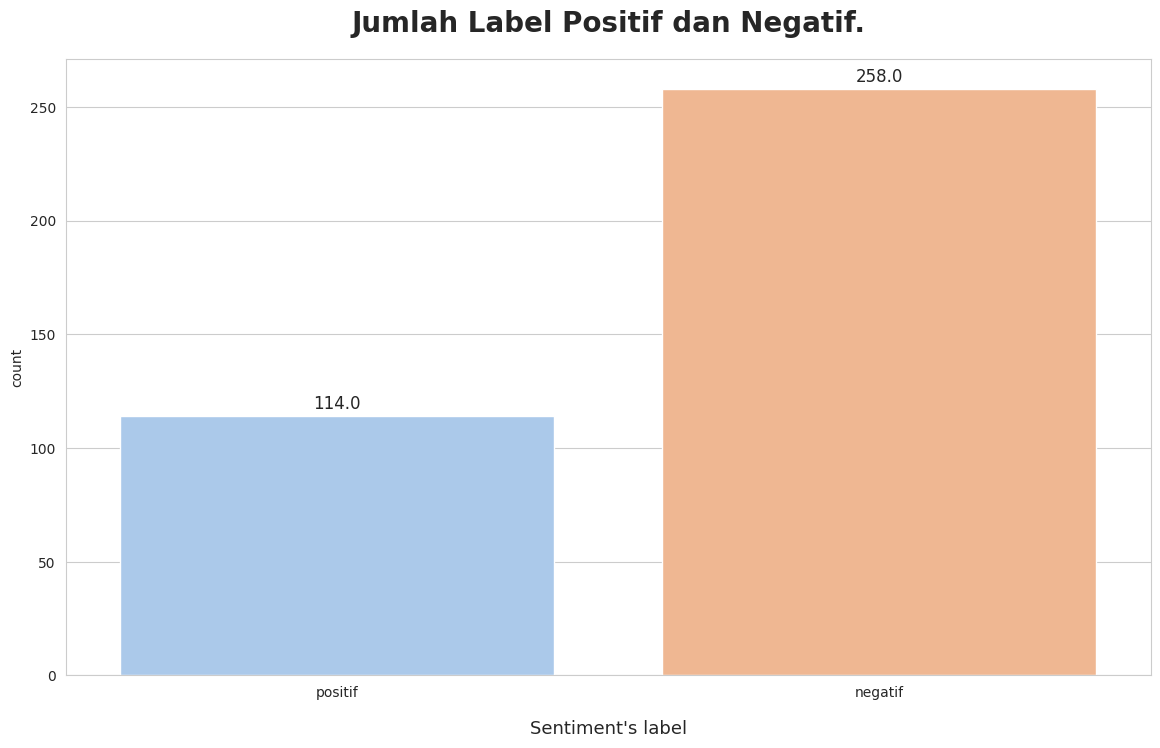

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=disney, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [ ]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in disney['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
disney['polarity'] = polarity

In [ ]:
disney['polarity']

0      1
1      1
2     -1
3      1
4     -1
      ..
367   -1
368   -1
369   -1
370   -1
371    1
Name: polarity, Length: 372, dtype: int64

In [ ]:
disney.polarity.value_counts()

polarity
-1    258
 1    114
Name: count, dtype: int64

In [ ]:
print("percentage of sentiment:")
train_pct_pos = disney.polarity.value_counts()[1]/disney.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = disney.polarity.value_counts()[-1]/disney.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 30.65 %
percentage of negative sentiment: 69.35 %
difference between percentage positive and negative: -38.71 %


### Sentiment WordCloud

#### Wordcloud for positive sentiment

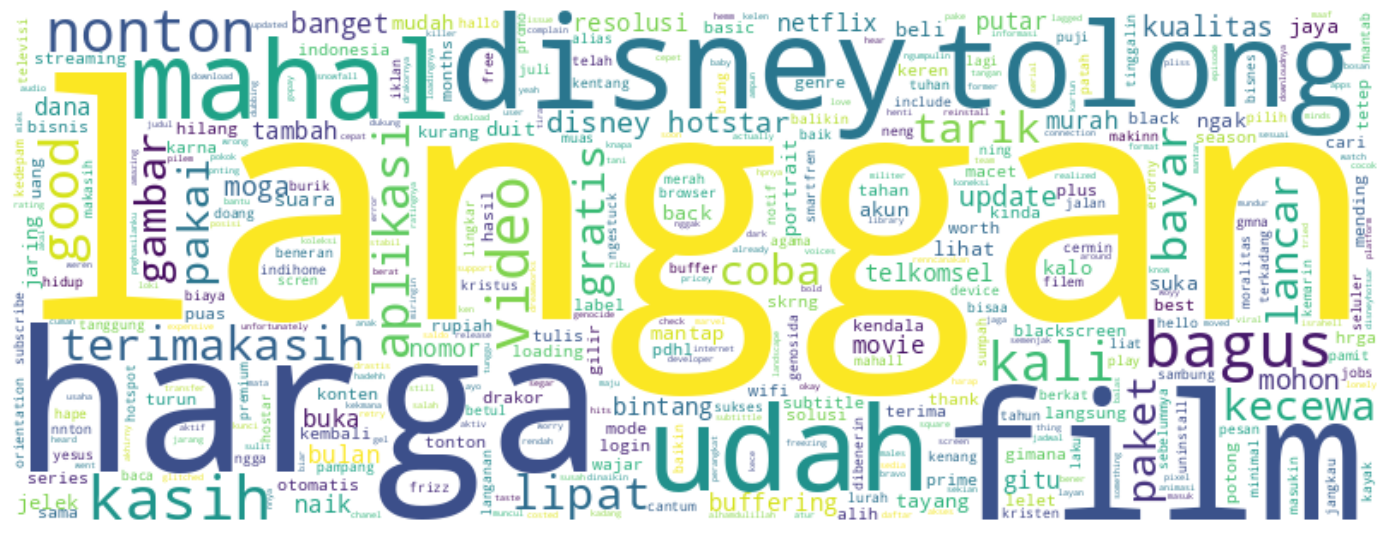

In [ ]:
sentiment_pos = ' '.join([review for review in disney['stem_review'][disney['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

#### Wordcloud for negative sentiment

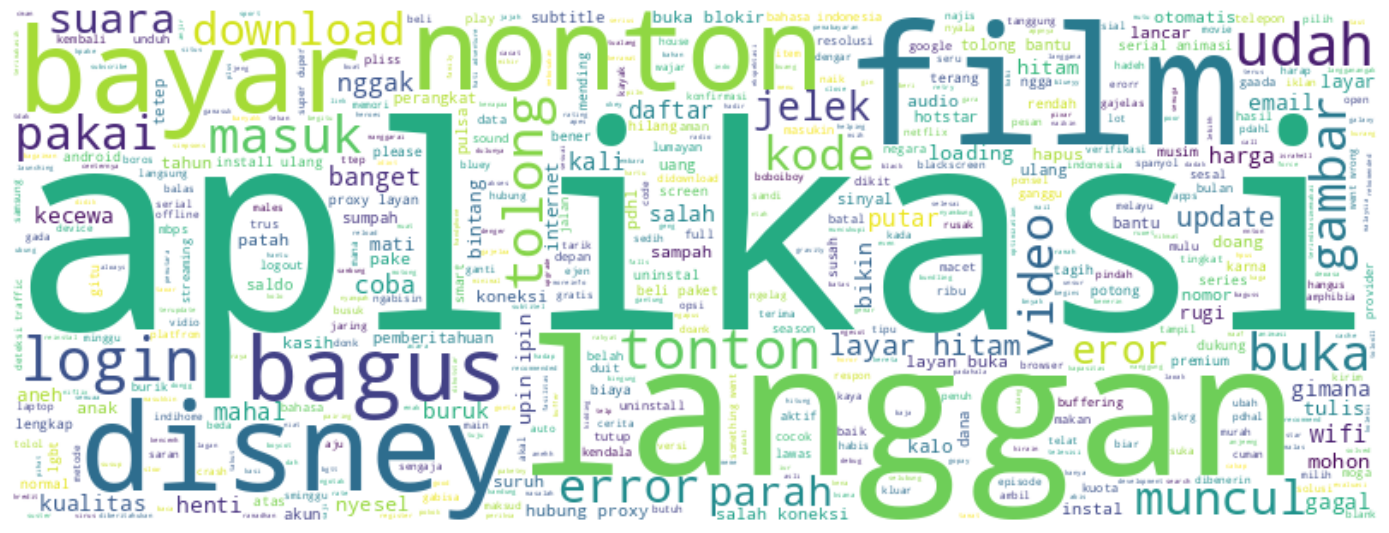

In [ ]:
sentiment_neg = ' '.join([review for review in disney['stem_review'][disney['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [ ]:
disney = disney.replace('',np.nan, regex=True)

In [ ]:
disney = disney.dropna()

In [ ]:
disney = disney.reset_index(drop=True)

In [ ]:
disney.to_excel("disney_fix_dataset.xlsx", index=False)



---



# Split the review into data train and test

In [ ]:
X = disney['stem_review']
y = disney['polarity']

In [ ]:
disney.head()

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Baru aja berlangganan videonya semua gak ada y...,24.05.20.1,baru aja berlangganan videonya semua gak ada y...,baru aja langgan video semua gak ada yang bisa...,baru langgan video semua yang bisa play se...,"[baru, langgan, video, semua, yang, bisa, play...","[langgan, video, play, buffering, buffering, m...",langgan video play buffering buffering ning ne...,"[langgan, video, play, buffering, buffering, n...",2,1
1,"Beneran kecewa, padahal udah include langganan...",24.05.06.7,beneran kecewa padahal udah include langganan ...,beneran kecewa padahal udah include langgan sa...,beneran kecewa padahal udah include langgan sa...,"[beneran, kecewa, padahal, udah, include, lang...","[beneran, kecewa, udah, include, langgan, indi...",beneran kecewa udah include langgan indihome b...,"[beneran, kecewa, udah, include, langgan, indi...",17,1
2,"Penipu anjeeeeng, nyesel aku langganan, tertul...",24.05.06.7,penipu anjeeng nyesel aku langganan tertulis p...,penipu anjeeng nyesel aku langgan tertulis p e...,penipu anjeeng nyesel langgan tertulis ha...,"[penipu, anjeeng, nyesel, langgan, tertulis, h...","[penipu, anjeeng, nyesel, langgan, tertulis, h...",tipu anjeeng nyesel langgan tulis hadir tolooll,"[tipu, anjeeng, nyesel, langgan, tulis, hadir,...",-4,-1
3,Tolong diperbaiki lagi,23.08.28.3,tolong diperbaiki lagi,tolong baik lagi,tolong baik lagi,"[tolong, baik, lagi]",[tolong],tolong,[tolong],1,1
4,Aplikasi nya bagus tapi knp Pixar nya harus be...,24.05.06.7,aplikasi nya bagus tapi knp pixar nya harus be...,aplikasi nya bagus tapi knp pixar nya harus la...,aplikasi bagus tapi pixar harus langgan ha...,"[aplikasi, bagus, tapi, pixar, harus, langgan,...","[aplikasi, bagus, pixar, langgan, bayar]",aplikasi bagus pixar langgan bayar,"[aplikasi, bagus, pixar, langgan, bayar]",-6,-1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

### Mencari parameter untuk data splitting terbaik yang menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi

In [ ]:
# Initialize lists to store results
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

# Loop through different test sizes and random states
for test in np.arange(0.1, 0.4, 0.1):
    for random in np.arange(0, 30, 5):
        print("test size:", test)
        print("random state:", random)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)

        # Vectorize the data using CountVectorizer
        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
        X_train_vect = vectorizer.fit_transform(X_train)
        X_test_vect = vectorizer.transform(X_test)

        # Train the Naive Bayes model
        Naive_bayes = MultinomialNB()
        Naive_bayes.fit(X_train_vect, y_train)
        print(Naive_bayes.score(X_train_vect, y_train))

        # Predict on the test set
        predict = Naive_bayes.predict(X_test_vect)

        # Calculate metrics
        accuracy = accuracy_score(y_test, predict)
        confusion = confusion_matrix(y_test, predict)
        class_report = classification_report(y_test, predict)

        # Print results
        print('confusion matrix:\n', confusion)
        print(class_report)
        print("Accuracy Score:", accuracy.round(2))
        recall = recall_score(y_test, predict, average='weighted')
        print("Recall Score:", recall)
        precision = precision_score(y_test, predict, average='weighted')
        print("Precision Score:", precision)
        print("\n")

        # Append results to lists
        random_num.append(random)
        matrix.append(confusion)
        report.append(class_report)
        acc_num.append(accuracy)
        re_num.append(recall)
        pre_num.append(precision)
        test_num.append(test)
    print("=================================================================")

test size: 0.1
random state: 0
0.9041916167664671
confusion matrix:
 [[29  0]
 [ 5  4]]
              precision    recall  f1-score   support

          -1       0.85      1.00      0.92        29
           1       1.00      0.44      0.62         9

    accuracy                           0.87        38
   macro avg       0.93      0.72      0.77        38
weighted avg       0.89      0.87      0.85        38

Accuracy Score: 0.87
Recall Score: 0.868421052631579
Precision Score: 0.8877708978328173


test size: 0.1
random state: 5
0.9041916167664671
confusion matrix:
 [[28  0]
 [ 9  1]]
              precision    recall  f1-score   support

          -1       0.76      1.00      0.86        28
           1       1.00      0.10      0.18        10

    accuracy                           0.76        38
   macro avg       0.88      0.55      0.52        38
weighted avg       0.82      0.76      0.68        38

Accuracy Score: 0.76
Recall Score: 0.7631578947368421
Precision Score: 0.820768

In [ ]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[29, 0], [5, 4]]",0.868421,0.868421,0.887771
1,0.1,5,"[[28, 0], [9, 1]]",0.763158,0.763158,0.820768
2,0.1,10,"[[25, 0], [10, 3]]",0.736842,0.736842,0.812030
3,0.1,15,"[[27, 1], [8, 2]]",0.763158,0.763158,0.743860
4,0.1,20,"[[26, 0], [7, 5]]",0.815789,0.815789,0.854864
5,0.1,25,"[[24, 1], [9, 4]]",0.736842,0.736842,0.752153
6,0.2,0,"[[51, 0], [18, 6]]",0.760000,0.760000,0.822609
7,0.2,5,"[[55, 0], [15, 5]]",0.800000,0.800000,0.842857
8,0.2,10,"[[52, 0], [18, 5]]",0.760000,0.760000,0.821714
9,0.2,15,"[[50, 1], [16, 8]]",0.773333,0.773333,0.799596


In [ ]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[29, 0], [5, 4]]",0.87,0.87,0.89
1,0.1,5,"[[28, 0], [9, 1]]",0.76,0.76,0.82
2,0.1,10,"[[25, 0], [10, 3]]",0.74,0.74,0.81
3,0.1,15,"[[27, 1], [8, 2]]",0.76,0.76,0.74
4,0.1,20,"[[26, 0], [7, 5]]",0.82,0.82,0.85
5,0.1,25,"[[24, 1], [9, 4]]",0.74,0.74,0.75
6,0.2,0,"[[51, 0], [18, 6]]",0.76,0.76,0.82
7,0.2,5,"[[55, 0], [15, 5]]",0.80,0.80,0.84
8,0.2,10,"[[52, 0], [18, 5]]",0.76,0.76,0.82
9,0.2,15,"[[50, 1], [16, 8]]",0.77,0.77,0.80


### Visualisasi grafik untuk melihat kenaikan akurasi terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan recall terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan precision terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Berdasarkan hasil penelitian di atas terkait parameter test_size dan random_state terbaik, diperoleh bahwa ukuran test_size = 0,1 dan random_state = 20 memperoleh nilai akurasi, recall, dan precision lebih tinggi dibandingkan ukuran yang lain. Sehingga ukuran tersebut akan digunakan untuk melakukan splitting dataset.

## Data Splitting into data train and data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
X_test.to_csv('disney_testing.csv')

In [ ]:
y_test.to_csv('disney_testing_label.csv')

In [ ]:
print("Jumlah sampel dalam X_train:", len(X_train))
print("Jumlah sampel dalam y_train:", len(y_train))
print("Jumlah sampel dalam X_test:", len(X_test))
print("Jumlah sampel dalam y_test:", len(y_test))

Jumlah sampel dalam X_train: 334
Jumlah sampel dalam y_train: 334
Jumlah sampel dalam X_test: 38
Jumlah sampel dalam y_test: 38


In [ ]:
# Inisialisasi dan fiturkan vektorisasi pada data latih
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X_train_vect = vectorizer.fit_transform(X_train)

In [ ]:
# Transformasi data uji menggunakan vektorisasi yang sama
X_test_vect = vectorizer.transform(X_test)

In [ ]:
X_train.shape

(334,)

In [ ]:
X_test.shape

(38,)

In [ ]:
X_train

135                  pakai wifi macet nonton lancar jaya
5             black screen atas install ulang moga depan
64                      tolong tambah subtitle indonesia
68                                   muncul gambar suara
7                              sumpah aplikasi aneh buka
                             ...                        
323                        pakai adblocker aplikasi buka
192                buffering henti henti film didownload
117    akun masuk susah login muncul tulis deteksi tr...
47      jelek banget anjir download ngabisin kuota bayar
172                                          good drakor
Name: stem_review, Length: 334, dtype: object

In [ ]:
print(X_train)

135                  pakai wifi macet nonton lancar jaya
5             black screen atas install ulang moga depan
64                      tolong tambah subtitle indonesia
68                                   muncul gambar suara
7                              sumpah aplikasi aneh buka
                             ...                        
323                        pakai adblocker aplikasi buka
192                buffering henti henti film didownload
117    akun masuk susah login muncul tulis deteksi tr...
47      jelek banget anjir download ngabisin kuota bayar
172                                          good drakor
Name: stem_review, Length: 334, dtype: object




---



# Data Modeling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
Naive_bayes = MultinomialNB()
Naive_bayes.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
predict = Naive_bayes.predict(X_test_vect)

In [ ]:
predict

array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predict'])
# predict_df['y_actual'] = y_test.ravel()

In [ ]:
predict_df

,predict
0,-1
1,-1
2,-1
3,1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [ ]:
print(Naive_bayes) # values of weight

MultinomialNB()


In [ ]:
print(Naive_bayes.class_log_prior_) # values of b

[-0.37741899 -1.15718064]


In [ ]:
print(Naive_bayes.classes_) # class of sentiment

[-1  1]


In [ ]:
print(Naive_bayes.feature_log_prob_)

[[-6.78574585 -6.89247349 -7.22526984 ... -7.22526984 -7.22526984
  -6.94651248]
 [-6.9747549  -6.9747549  -6.84614406 ... -6.84614406 -6.72675804
  -6.9747549 ]]


In [ ]:
Naive_bayes.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9011976047904192

In [ ]:
Naive_bayes.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.868421052631579

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.5263157894736842




---



## Final Visualization that represented the result of Predicted

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

4
34


In [ ]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,-1,34
1,1,4


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 10.53 %
percentage of negative sentiment: 89.47 %
difference between percentage positive and negative: -78.95 %


### Pie Chart

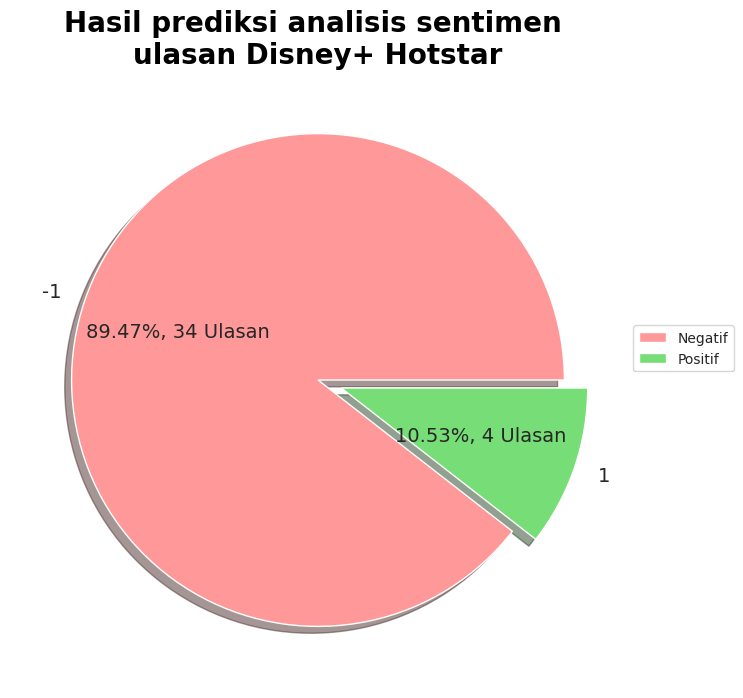

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan Disney+ Hotstar', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

# plt.savefig('Hasilprediksi_sayurbox.png')
plt.show()

Model berhasil memprediksi data uji ulasan sebagai sentimen positif sebesar 70,37% atau sebanyak 114 ulasan dan sentimen negatif sebesar 29,63% atau sebanyak 48 ulasan. Dapat dilihat bahwa model lebih banyak memprediksi ulasan baru sebagai sentimen positif dibandingkan dengan negatif. Penyebabnya adalah di masa lampau model lebih banyak belajar dan
mengenali pola data ulasan yang positif dibandingkan negatif, sehingga model menjadi kurang mempelajari pola data ulasan yang negatif.



---



# Evaluation

In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[29,  0],
       [ 5,  4]])

### Confusion matrix visualization

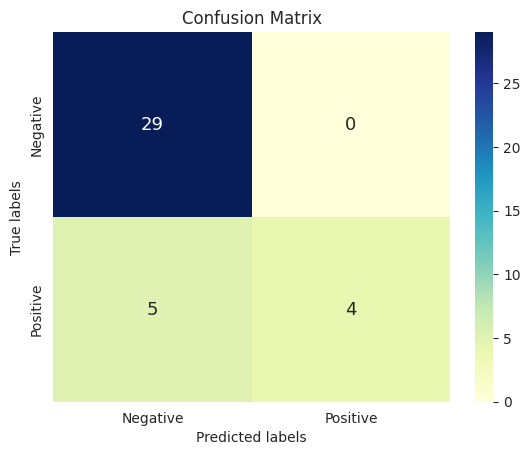

In [ ]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
target_names = ['Negative','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.85      1.00      0.92        29
    Positive       1.00      0.44      0.62         9

    accuracy                           0.87        38
   macro avg       0.93      0.72      0.77        38
weighted avg       0.89      0.87      0.85        38



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi,2))

recall = recall_score(y_test, predict)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, predict)
print("Precision model:", round(precision,2))

Accuracy model: 0.87
Recall model: 0.44
Precision model: 1.0


Berdasarkan penelitian yang telah dilakukan menggunakan metode Lexicon-Based dan algoritma Support Vector Machine, didapatkan nilai accuracy sebesar 94%, recall sebesar 96%, precision sebesar 96%, dan kesalahan prediksi sebanyak 9 data. Selain itu, diperoleh juga hasil prediksi data uji ulasan Sayurbox sebagai sentimen positif sebanyak 114 ulasan dan sentimen negatif sebanyak 48 ulasan. Diketahui bahwa algoritma Support Vector Machine cenderung memprediksi data uji sebagai sentimen positif dibandingkan sentimen negatif. Oleh karena itu, dapat ditarik sebuah asumsi bahwa pengguna senang, serta suka terhadap pelayanan, pengiriman, kualitas, dan harga produk yang diberikan oleh Sayurbox.

In [ ]:
import pickle

pickle.dump(Naive_bayes, open('sentiment_disney.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer_disney.pkl', 'wb'))